In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
human_data = pd.read_table('human_data.txt')
dog_data = pd.read_table('dog_data.txt')
chimp_data = pd.read_table('chimp_data.txt')

In [3]:
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [4]:
dog_data.head()

,sequence,class
0,ATGCCACAGCTAGATACATCCACCTGATTTATTATAATCTTTTCAA...,4
1,ATGAACGAAAATCTATTCGCTTCTTTCGCTGCCCCCTCAATAATAG...,4
2,ATGGAAACACCCTTCTACGGCGATGAGGCGCTGAGCGGCCTGGGCG...,6
3,ATGTGCACTAAAATGGAACAGCCCTTCTACCACGACGACTCATACG...,6
4,ATGAGCCGGCAGCTAAACAGAAGCCAGAACTGCTCCTTCAGTGACG...,0


In [5]:
chimp_data.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


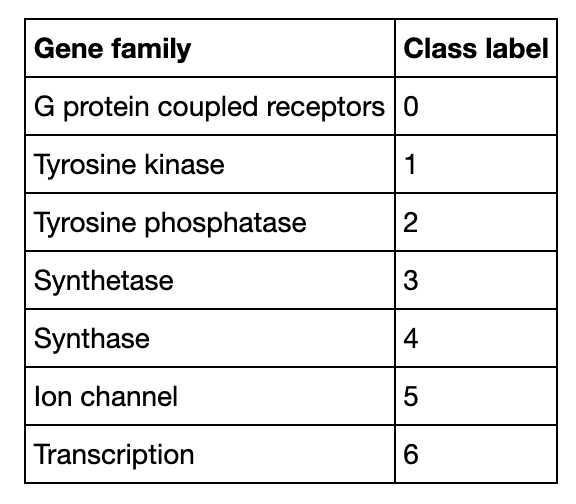

In [6]:
from IPython.display import Image
Image('Gene family and classes.png')

### Here we will treat DNA sequence as a language, using k-mer counting

In [7]:
# convert DNA sequences to k-mer words, taking default size as 6
def get_kmers(sequence, size=6):
    return [sequence[x:x+size].lower() for x in range(len(sequence)-size+1)]

In [8]:
human_data['words'] = human_data.apply(lambda x: get_kmers(x['sequence']), axis=1)
human_data = human_data.drop('sequence', axis=1)
dog_data['words'] = dog_data.apply(lambda x: get_kmers(x['sequence']), axis=1)
dog_data = dog_data.drop('sequence', axis=1)
chimp_data['words'] = chimp_data.apply(lambda x: get_kmers(x['sequence']), axis=1)
chimp_data = chimp_data.drop('sequence', axis=1)

In [9]:
human_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


<AxesSubplot:title={'center':'Human gene classes'}>

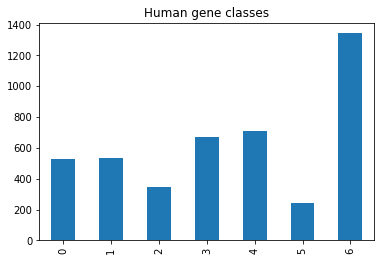

In [41]:
human_data['class'].value_counts().sort_index().plot.bar(title='Human gene classes')

<AxesSubplot:title={'center':'Dog gene classes'}>

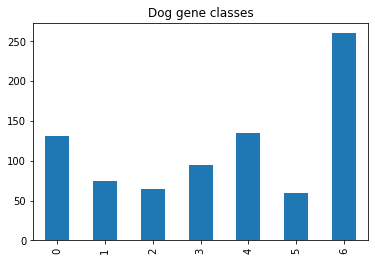

In [42]:
dog_data['class'].value_counts().sort_index().plot.bar(title='Dog gene classes')

<AxesSubplot:title={'center':'Chimpanzee gene classes'}>

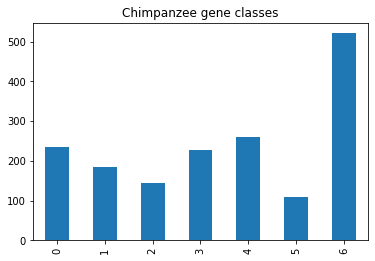

In [43]:
chimp_data['class'].value_counts().sort_index().plot.bar(title='Chimpanzee gene classes')

### The datasets are pretty balanced

In [26]:
# convert the lists of k-mer words to string sentences of words for feeding to count vectorizer
human_texts = list(human_data['words'])
for word in range(len(human_texts)):
    human_texts[word] = ' '.join(human_texts[word])
y_human = human_data.iloc[:, 0].values

In [18]:
human_texts[0]

'atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaa

In [27]:
y_human

array([4, 4, 3, ..., 6, 6, 6], dtype=int64)

In [28]:
dog_texts = list(dog_data['words'])
for word in range(len(dog_texts)):
    dog_texts[word] = ' '.join(dog_texts[word])
y_dog = dog_data.iloc[:, 0].values

chimp_texts = list(chimp_data['words'])
for word in range(len(chimp_texts)):
    chimp_texts[word] = ' '.join(chimp_texts[word])
y_chimp = chimp_data.iloc[:, 0].values

In [21]:
dog_texts[0]

'atgcca tgccac gccaca ccacag cacagc acagct cagcta agctag gctaga ctagat tagata agatac gataca atacat tacatc acatcc catcca atccac tccacc ccacct cacctg acctga cctgat ctgatt tgattt gattta atttat tttatt ttatta tattat attata ttataa tataat ataatc taatct aatctt atcttt tctttt cttttc ttttca tttcaa ttcaat tcaata caatat aatatt atattt tatttc atttct tttctc ttctca tctcac ctcacc tcaccc caccct accctc ccctct cctctt ctcttc tcttca cttcat ttcatc tcatcc catcct atccta tcctat cctatt ctattt tatttc atttca tttcaa ttcaac tcaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaatt aaattt aatttc atttca tttcaa ttcaaa tcaaat caaatc aaatca aatcac atcact tcacta cactac actact ctacta tactac actacc ctaccc taccca acccag cccaga ccagaa cagaaa agaaaa gaaaac aaaacc aaaccc aacccg acccga cccgat ccgata cgataa gataac ataacc taacca aaccaa accaaa ccaaat caaatc aaatct aatctg atctgc tctgct ctgcta tgctaa gctaaa ctaaaa taaaat aaaatt aaattg aattgc attgct ttgctg tgctgg gctggt ctggtc tggtca ggtcaa gtcaac tcaaca caacat aacata acataa cataat ataat

In [29]:
y_dog

array([4, 4, 6, 6, 0, 6, 0, 0, 0, 0, 0, 6, 6, 0, 0, 0, 6, 0, 0, 0, 0, 0,
       6, 0, 0, 0, 6, 0, 0, 6, 0, 0, 0, 0, 0, 0, 3, 0, 6, 0, 6, 0, 6, 0,
       6, 0, 0, 3, 3, 6, 6, 6, 6, 4, 0, 0, 4, 2, 0, 0, 0, 0, 6, 0, 6, 0,
       0, 5, 5, 6, 4, 6, 0, 0, 3, 6, 3, 6, 6, 6, 6, 6, 4, 6, 4, 1, 4, 0,
       0, 0, 6, 4, 4, 6, 6, 6, 6, 6, 4, 6, 6, 3, 3, 3, 3, 0, 6, 3, 3, 6,
       4, 4, 5, 6, 6, 1, 5, 2, 2, 1, 4, 2, 6, 3, 3, 6, 6, 6, 3, 3, 6, 6,
       6, 3, 6, 6, 2, 0, 0, 6, 6, 3, 3, 3, 0, 0, 4, 6, 6, 5, 1, 1, 0, 0,
       0, 4, 0, 4, 0, 0, 3, 4, 6, 0, 6, 6, 3, 4, 0, 6, 6, 1, 2, 2, 2, 3,
       6, 2, 2, 2, 6, 0, 0, 6, 6, 0, 0, 1, 6, 5, 5, 6, 0, 6, 0, 0, 4, 0,
       0, 3, 4, 0, 0, 6, 6, 5, 5, 3, 4, 1, 0, 6, 5, 6, 6, 4, 4, 2, 2, 2,
       4, 6, 4, 4, 2, 1, 3, 6, 0, 6, 2, 3, 0, 0, 6, 0, 6, 4, 3, 1, 1, 4,
       6, 4, 4, 6, 3, 3, 2, 2, 1, 1, 3, 3, 4, 3, 0, 3, 5, 5, 5, 5, 5, 5,
       5, 2, 2, 4, 4, 6, 4, 4, 6, 6, 6, 0, 3, 3, 4, 3, 0, 0, 6, 0, 0, 6,
       6, 1, 5, 5, 0, 0, 6, 6, 1, 1, 1, 4, 2, 2, 3,

In [24]:
chimp_texts[0]

'atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatacc ataccg taccgc accgcc ccgccg cgccgt gccgta ccgtat cgtatg gtatga tatgac atgacc tgaccc gaccca acccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctg tcctga cctgac ctgaca tgacac gacact acacta cactat actatt ctattt tatttc atttct tttctc ttctcg tctcgt ctcgtc tcgtca cgtcac gtcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaat taaatt aaattc aattca attcaa ttcaaa tcaaat caaatt aaatta aattac attacc ttacca taccat accatc ccatct catcta atctac tctacc ctaccc tacccc accccc cccccc ccccct cccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaaa caaaac aaaacc aaaccc aaccca acccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaac aaaact aaacta aactac actaca ctacaa tacaat acaata caataa aataaa ataaa

In [30]:
y_chimp

array([4, 4, 4, ..., 6, 3, 3], dtype=int64)

In [32]:
# apply bag of words using count vectorizer 
# n-gram size of 4 determined beforehand from testing
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X_human = cv.fit_transform(human_texts)
X_dog = cv.transform(dog_texts)
X_chimp = cv.transform(chimp_texts)

In [33]:
print(X_human.shape)
print(X_dog.shape)
print(X_chimp.shape)

(4380, 232414)
(820, 232414)
(1682, 232414)


In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_human, y_human, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(3504, 232414)
(876, 232414)


In [45]:
# model building using Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=0.1)
mnb.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

In [47]:
y_pred = mnb.predict(X_test)

In [49]:
# model evaluation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print('Confusion matrix: ')
print(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')))

def get_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = get_metrics(y_test, y_pred)
print('accuracy: %.4f\nprecision: %.4f\nrecall: %.4f\nf1 score: %.4f' % (accuracy, precision, recall, f1))

Confusion matrix: 
Predicted    0   1   2    3    4   5    6
Actual                                   
0          105   0   0    0    0   0    1
1            0  94   0    0    0   0    0
2            1   0  73    2    0   0    1
3            2   0   0  123    0   0   11
4            2   0   0    0  129   0    4
5            3   0   0    0    0  45    2
6            1   0   0    0    0   0  277
accuracy: 0.9658
precision: 0.9676
recall: 0.9658
f1 score: 0.9657
